In [1]:
import pandas as pd
import numpy as np

In [2]:
churn_data = pd.read_csv("churn_data.csv")
customer_data = pd.read_csv("customer_data.csv")
internet_data = pd.read_csv("internet_data.csv")

In [3]:
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [4]:
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

In [6]:
varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']
telecom[varlist] = telecom[varlist].apply(lambda x: x.map({'Yes':1, 'No':0}))

In [7]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [8]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

In [10]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [11]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


In [12]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [18]:
#The varaible was imported as a string we need to convert it to float
# telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'])

telecom['TotalCharges'] = telecom['TotalCharges'].apply(pd.to_numeric, errors='coerce')

In [21]:
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


In [22]:
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [23]:
telecom = telecom[~ np.isnan(telecom['TotalCharges'])]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = telecom.drop(['Churn','customerID'], axis=1)
y = telecom['Churn']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head()

C:\Users\BhagavanReddy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\BhagavanReddy\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,...,0,1,1,0,1,0,0,1,0,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,1


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

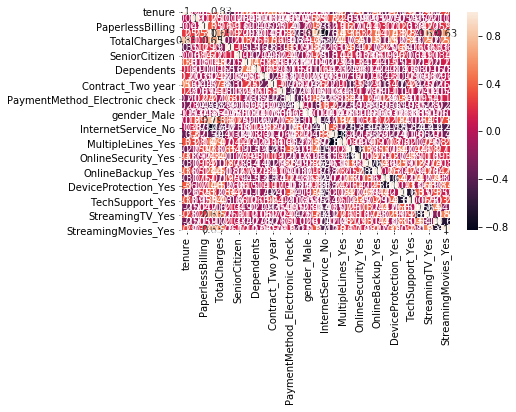

In [33]:
sns.heatmap(telecom.corr(),annot = True)

In [34]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

In [35]:
import statsmodels.api as sm

In [36]:
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

C:\Users\BhagavanReddy\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Mon, 17 Aug 2020   Deviance:                       4009.4
Time:                        22:54:11   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

In [37]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [38]:
from sklearn.feature_selection import RFE

In [39]:
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

C:\Users\BhagavanReddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BhagavanReddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BhagavanReddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BhagavanReddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BhagavanReddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

In [40]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 6),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 8),
 ('Dependents', False, 4),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 3),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 9),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', False, 2),
 ('DeviceProtection_Yes', False, 7),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', False, 5)]

In [41]:
col = X_train.columns[rfe.support_]

In [44]:
X_train_sm = sm.add_constant(X_train[col])

In [42]:
logm2 = sm.GLM(y_train, (sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm2.fit().summary()

C:\Users\BhagavanReddy\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.8
Date:                Mon, 17 Aug 2020   Deviance:                       4023.5
Time:                        22:57:49   Pearson chi2:                 6.22e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.0343      0.171     -6.053      0.000      -1.369      -0.699
tenure                                   -1.5386      0.184     -8.381      0.000      -1.898      -1.179
PhoneService                             -0.5231      0.161     -3.256      0.001      -0.838      -0.208
PaperlessBilling                          0.3397      0.090      3.789      0.000       0.164       0.515
TotalCharges                              0.7116      0.188      3.794      0.000       0.344       1.079
SeniorCitizen                             0.4294      0.100      4.312      0.000       0.234       0.625
Contract_One year                        -0.6813      0.128     -5.334      0.000      -0.932      -0.431
Contract_Two year                        -1.2680      0.211     -6.011      0.000      -1.681      -0.855
PaymentMethod_Credit card (automatic)    -0.3775      0.113     -3.352      0.001      -0.598      -0.157
PaymentMethod_Mailed check               -0.3760      0.111     -3.389      0.001      -0.594      -0.159
InternetService_Fiber optic               0.7421      0.117      6.317      0.000       0.512       0.972
InternetService_No                       -0.9385      0.166     -5.650      0.000      -1.264      -0.613
MultipleLines_Yes                         0.2086      0.096      2.181      0.029       0.021       0.396
OnlineSecurity_Yes                       -0.4049      0.102     -3.968      0.000      -0.605      -0.205
TechSupport_Yes                          -0.3967      0.102     -3.902      0.000      -0.596      -0.197
StreamingTV_Yes                           0.2747      0.094      2.911      0.004       0.090       0.460
=========================================================================================================
"""

In [43]:
res = logm2.fit()

In [45]:
y_train_pred = res.predict(X_train_sm)

In [46]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22511138, 0.27489289, 0.69212611, 0.50490896, 0.6452606 ,
       0.41754449, 0.42013086, 0.80942651, 0.2232105 , 0.51224637])

In [48]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred, 'cust_id':y_train.index})
y_train_pred_final.head()

,churn,churn_prob,cust_id
0,0,0.225111,879
1,0,0.274893,5790
2,1,0.692126,6498
3,1,0.504909,880
4,1,0.645261,2784


In [49]:
y_train_pred_final['predicted'] = y_train_pred_final.churn_prob.map(lambda x: 1 if x>0.5 else 0)

In [50]:
y_train_pred_final.head()

,churn,churn_prob,cust_id,predicted
0,0,0.225111,879,0
1,0,0.274893,5790,0
2,1,0.692126,6498,1
3,1,0.504909,880,1
4,1,0.645261,2784,1


In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [57]:
print(confusion_matrix(y_train_pred_final.churn, y_train_pred_final.predicted))

[[3270  365]
 [ 579  708]]


In [58]:
print(accuracy_score(y_train_pred_final.churn, y_train_pred_final.predicted))

0.8082080455099553


In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
vif = pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,PhoneService,8.86
3,TotalCharges,7.37
0,tenure,6.88
9,InternetService_Fiber optic,3.97
6,Contract_Two year,3.28
10,InternetService_No,3.25
2,PaperlessBilling,2.68
11,MultipleLines_Yes,2.53
14,StreamingTV_Yes,2.34
13,TechSupport_Yes,2.08


In [63]:
col = col.drop('PhoneService', 1)
col

Index(['tenure', 'PaperlessBilling', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes'],
      dtype='object')

In [64]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
logm3.fit().summary()

C:\Users\BhagavanReddy\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2017.0
Date:                Tue, 18 Aug 2020   Deviance:                       4034.0
Time:                        09:13:50   Pearson chi2:                 5.94e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3885      0.133    -10.437      0.000      -1.649      -1.128
tenure                                   -1.4138      0.179     -7.884      0.000      -1.765      -1.062
PaperlessBilling                          0.3425      0.089      3.829      0.000       0.167       0.518
TotalCharges                              0.5936      0.184      3.225      0.001       0.233       0.954
SeniorCitizen                             0.4457      0.099      4.486      0.000       0.251       0.640
Contract_One year                        -0.6905      0.128     -5.411      0.000      -0.941      -0.440
Contract_Two year                        -1.2646      0.211     -6.002      0.000      -1.678      -0.852
PaymentMethod_Credit card (automatic)    -0.3785      0.113     -3.363      0.001      -0.599      -0.158
PaymentMethod_Mailed check               -0.3769      0.111     -3.407      0.001      -0.594      -0.160
InternetService_Fiber optic               0.6241      0.111      5.645      0.000       0.407       0.841
InternetService_No                       -1.0940      0.158     -6.919      0.000      -1.404      -0.784
MultipleLines_Yes                         0.1607      0.094      1.712      0.087      -0.023       0.345
OnlineSecurity_Yes                       -0.4094      0.102     -4.016      0.000      -0.609      -0.210
TechSupport_Yes                          -0.4085      0.101     -4.025      0.000      -0.607      -0.210
StreamingTV_Yes                           0.3077      0.094      3.277      0.001       0.124       0.492
=========================================================================================================
"""

In [65]:
confusion = confusion_matrix(y_train_pred_final.churn, y_train_pred_final.predicted)

In [66]:
confusion

array([[3270,  365],
       [ 579,  708]], dtype=int64)

In [67]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [68]:
print(TP / float(TP+FN))
print(FP/ float(TN+FP))

0.5501165501165501
0.10041265474552957


In [71]:
from sklearn import metrics

In [69]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [74]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churn, y_train_pred_final.churn_prob, drop_intermediate = False )

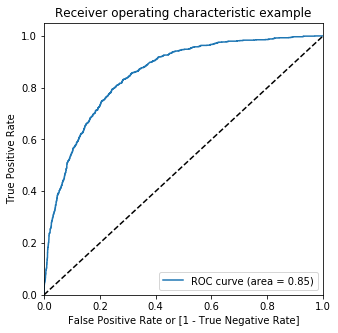

In [75]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_prob)

In [81]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.churn_prob.map(lambda x: 1 if x>i else 0)

In [79]:
y_train_pred_final = y_train_pred_final.drop('tempdel', axis=1)

In [82]:
y_train_pred_final

,churn,churn_prob,cust_id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.225111,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.274893,5790,0,1,1,1,0,0,0,0,0,0,0
2,1,0.692126,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.504909,880,1,1,1,1,1,1,1,0,0,0,0
4,1,0.645261,2784,1,1,1,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4917,0,0.015864,79,0,1,0,0,0,0,0,0,0,0,0
4918,0,0.112124,3934,0,1,1,0,0,0,0,0,0,0,0
4919,0,0.040532,5964,0,1,0,0,0,0,0,0,0,0,0
4920,0,0.133069,6947,0,1,1,0,0,0,0,0,0,0,0


In [84]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.620479  0.947164  0.504814
0.2   0.2  0.715156  0.867910  0.661073
0.3   0.3  0.767980  0.779332  0.763961
0.4   0.4  0.794799  0.679876  0.835488
0.5   0.5  0.808208  0.550117  0.899587
0.6   0.6  0.803129  0.391608  0.948831
0.7   0.7  0.777936  0.194250  0.984594
0.8   0.8  0.746648  0.033411  0.999175
0.9   0.9  0.738521  0.000000  1.000000


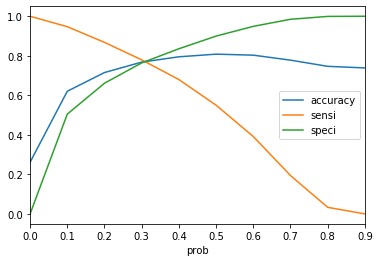

In [85]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [86]:
y_train_pred_final['final_predicted'] = y_train_pred_final.churn_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,churn,churn_prob,cust_id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.225111,879,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.274893,5790,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.692126,6498,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.504909,880,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.645261,2784,1,1,1,1,1,1,1,1,0,0,0,1


In [88]:
metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)

0.7679804957334417

In [93]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

In [90]:
print(precision_score(y_train_pred_final.churn, y_train_pred_final.predicted))
print(recall_score(y_train_pred_final.churn, y_train_pred_final.predicted))

0.6598322460391426
0.5501165501165501


In [95]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.churn, y_train_pred_final.churn_prob)

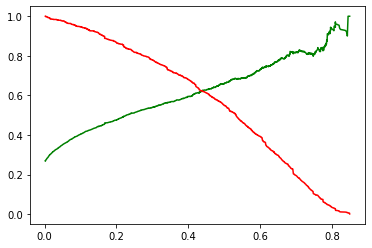

In [96]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [97]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [98]:
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

C:\Users\BhagavanReddy\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


ValueError: shapes (2110,15) and (16,) not aligned: 15 (dim 1) != 16 (dim 0)